# Random Ops Search Results Visualization

This notebook visualizes the search results from random operations test.

The plot shows:
- **X-axis**: Minutes (0-59)
- **Y-axis**: Average Recall
- **Scatter plot**: Each point represents the average recall for queries executed in that minute


In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11


In [2]:
# Load data
json_path = '../data/t2i-10M/random_ops_search_results.json'

with open(json_path, 'r') as f:
    data = json.load(f)

# Extract data
minute_stats = data['minute_stats']
test_duration = data['test_duration_minutes']

# Extract minutes and recall values
minutes = [stat['minute'] for stat in minute_stats]
recalls = [stat['avg_recall'] for stat in minute_stats]
query_counts = [stat['query_count'] for stat in minute_stats]

print(f"Test duration: {test_duration} minutes")
print(f"Total data points: {len(minute_stats)}")
print(f"Recall range: {min(recalls):.6f} - {max(recalls):.6f}")
print(f"Average recall: {np.mean(recalls):.6f}")
print(f"Total queries: {sum(query_counts):,}")


Test duration: 60 minutes
Total data points: 60
Recall range: 0.933161 - 0.935827
Average recall: 0.934862
Total queries: 359,704


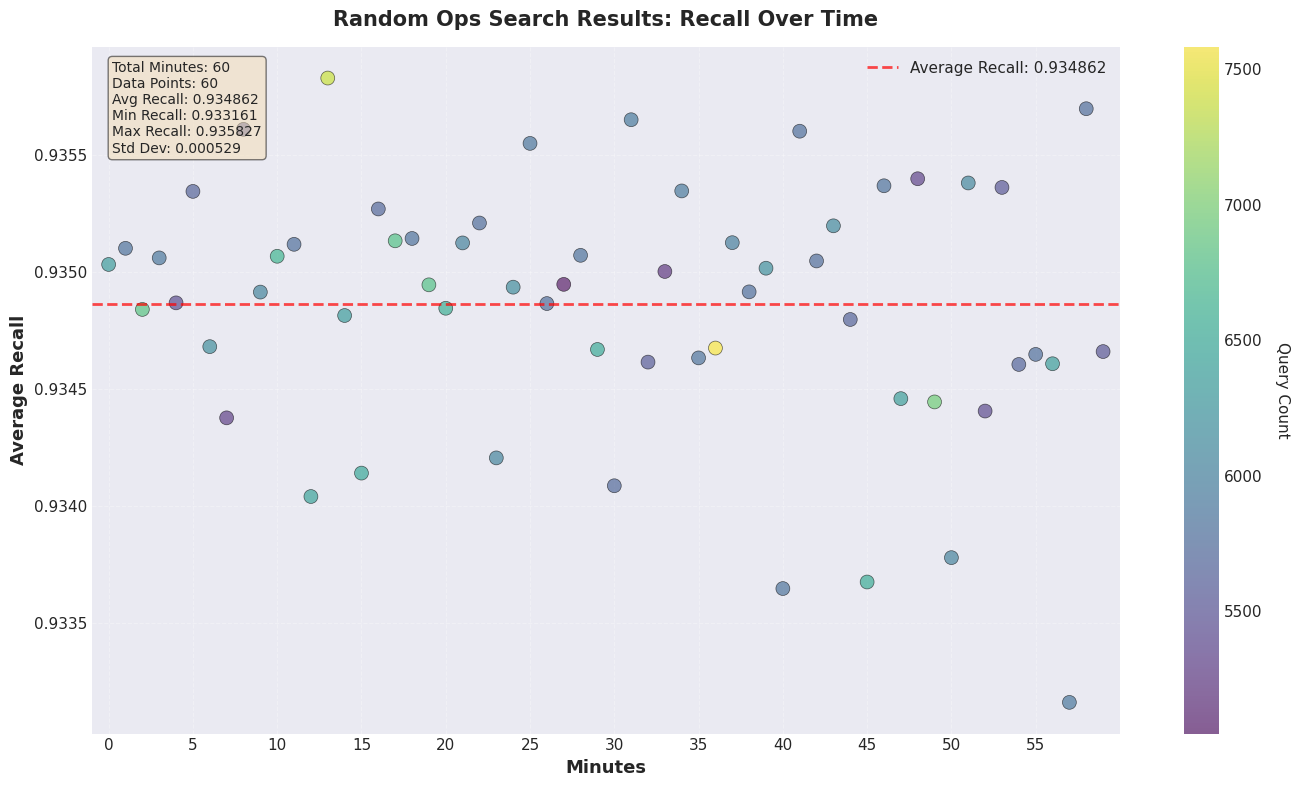

In [3]:
# Create scatter plot
fig, ax = plt.subplots(figsize=(14, 8))

# Scatter plot with color based on query count
scatter = ax.scatter(minutes, recalls, 
                     c=query_counts, 
                     s=100, 
                     alpha=0.6, 
                     cmap='viridis',
                     edgecolors='black',
                     linewidth=0.5)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Query Count', rotation=270, labelpad=20)

# Customize plot
ax.set_xlabel('Minutes', fontsize=13, fontweight='bold')
ax.set_ylabel('Average Recall', fontsize=13, fontweight='bold')
ax.set_title('Random Ops Search Results: Recall Over Time', 
             fontsize=15, fontweight='bold', pad=15)

# Add grid
ax.grid(True, alpha=0.3, linestyle='--')

# Set x-axis to show all minutes
ax.set_xlim(-1, test_duration)
ax.set_xticks(range(0, test_duration, 5))

# Add horizontal line for average recall
avg_recall = np.mean(recalls)
ax.axhline(y=avg_recall, color='red', linestyle='--', linewidth=2, 
           label=f'Average Recall: {avg_recall:.6f}', alpha=0.7)
ax.legend(loc='best')

# Add statistics text box
stats_text = f'Total Minutes: {test_duration}\n'
stats_text += f'Data Points: {len(minute_stats)}\n'
stats_text += f'Avg Recall: {avg_recall:.6f}\n'
stats_text += f'Min Recall: {min(recalls):.6f}\n'
stats_text += f'Max Recall: {max(recalls):.6f}\n'
stats_text += f'Std Dev: {np.std(recalls):.6f}'

ax.text(0.02, 0.98, stats_text, 
        transform=ax.transAxes, 
        fontsize=10,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


In [ ]:
# Additional analysis: Recall distribution over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Scatter with trend line
ax1.scatter(minutes, recalls, alpha=0.6, s=80, color='steelblue', edgecolors='black', linewidth=0.5)

# Add trend line (polynomial fit)
z = np.polyfit(minutes, recalls, 1)
p = np.poly1d(z)
ax1.plot(minutes, p(minutes), "r--", alpha=0.8, linewidth=2, label=f'Trend: y={z[0]:.2e}x+{z[1]:.6f}')

ax1.set_xlabel('Minutes', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Recall', fontsize=12, fontweight='bold')
ax1.set_title('Recall Over Time with Trend Line', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlim(-1, test_duration)

# Right plot: Histogram of recall values
ax2.hist(recalls, bins=30, color='steelblue', alpha=0.7, edgecolor='black')
ax2.axvline(x=avg_recall, color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {avg_recall:.6f}')
ax2.set_xlabel('Average Recall', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_title('Distribution of Recall Values', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Summary statistics
print("=" * 60)
print("Summary Statistics")
print("=" * 60)
print(f"Test Duration: {test_duration} minutes")
print(f"Total Data Points: {len(minute_stats)}")
print(f"\nRecall Statistics:")
print(f"  Mean:   {np.mean(recalls):.6f}")
print(f"  Median: {np.median(recalls):.6f}")
print(f"  Std:    {np.std(recalls):.6f}")
print(f"  Min:    {np.min(recalls):.6f} (minute {minutes[np.argmin(recalls)]})")
print(f"  Max:    {np.max(recalls):.6f} (minute {minutes[np.argmax(recalls)]})")
print(f"  Range:  {np.max(recalls) - np.min(recalls):.6f}")
print(f"\nQuery Count Statistics:")
print(f"  Total Queries: {sum(query_counts):,}")
print(f"  Mean per minute: {np.mean(query_counts):.1f}")
print(f"  Min: {min(query_counts):,} (minute {minutes[np.argmin(query_counts)]})")
print(f"  Max: {max(query_counts):,} (minute {minutes[np.argmax(query_counts)]})")
print("=" * 60)
